Attrition refers to the process of a company losing its customer base. It occurs when the workforce at a company gradually decreases because of retirements and resignations, with these vacant positions not being filled.

Reducing staff levels through attrition is commonly known as a hiring freeze. It is viewed as a less disruptive method to trim the workforce and reduce payroll compared to layoffs.

In this notebook, our goal is to thoroughly analyze the datasets with respect to each feature and identify the reasons behind employee attrition. We aim to pinpoint the top factors that contribute to employee attrition.

Here's some additional information about the data:

- Education is categorized into five levels: 'Below College,' 'College,' 'Bachelor,' 'Master,' and 'Doctor.'
- Environment Satisfaction has four levels: 'Low,' 'Medium,' 'High,' and 'Very High.'
- Job Involvement is classified as 'Low,' 'Medium,' 'High,' and 'Very High.'
- Job Satisfaction is measured on a scale of 'Low,' 'Medium,' 'High,' and 'Very High.'
- Performance Rating has four categories: 'Low,' 'Good,' 'Excellent,' and 'Outstanding.'
- Relationship Satisfaction is divided into 'Low,' 'Medium,' 'High,' and 'Very High.'
- Work-Life Balance has four levels: 'Bad,' 'Good,' 'Better,' and 'Best.'

Additionally, here are some descriptions to help you understand certain features:

- Hourly Rate: This is the wage paid to hourly employees for each hour worked, as opposed to salaried employees.
- Employee Number: It's a unique identifier assigned to each current and former employee.
- Job Level: Job levels indicate the responsibilities and expectations associated with different roles in the organization. They often influence salary bands and job titles.
- Stock Option Level: Employee stock options are granted to certain employees, usually in management or officer positions. They allow employees to purchase company stock at a specified price within a specific timeframe, often with expiration dates.


####Mechanism
The modeling will be implemented in 2 phases:

Phase 1
Since the target is imbalance, in this phase I would create 4 different datasets (imbalance, undersampling, oversampling random, and oversampling smote) to see which treatment is best for imbalance class.

Phase 2
In this phase, I would focusing on improving model's performance through feature engineering and feature selection.

#imports

In [1]:
!pip install catboost
!pip install shap

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from imblearn import under_sampling, over_sampling
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from mlxtend.evaluate import bias_variance_decomp
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix
import shap
from shap import summary_plot



In [3]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_colwidth", 1000)
pd.set_option("display.max_rows", 1000)


In [4]:
df=pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [5]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df['Attrition'] = np.where(df['Attrition']=='Yes', 1, 0)
df['OverTime'] = np.where(df['OverTime']=='Yes', 1, 0)

In [8]:
nums_features1 = ['Age','DailyRate','DistanceFromHome','Education','EmployeeCount','EmployeeNumber',
                 'EnvironmentSatisfaction', 'HourlyRate','JobInvolvement','JobLevel', 'JobSatisfaction','MonthlyIncome',
                 'MonthlyRate','NumCompaniesWorked','OverTime']

nums_features2 = ['PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours','StockOptionLevel',
                 'TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole',
                 'YearsSinceLastPromotion','YearsWithCurrManager']

cats_features = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18']

#EDA

Descriptive Statistic

In [9]:
df[nums_features1].describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,0.282993
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,0.450606
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,0.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,1.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,1.000000


In [10]:
df[nums_features2].describe()

,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
df[cats_features].describe()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18
count,1470,1470,1470,1470,1470,1470,1470
unique,3,3,6,2,9,3,1
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y
freq,1043,961,606,882,326,673,1470


Most of numerical features with nominal data type has a high variation therefore it's positively skewed. And for categorical features, the unique value is only a few.

Univariate Analysis


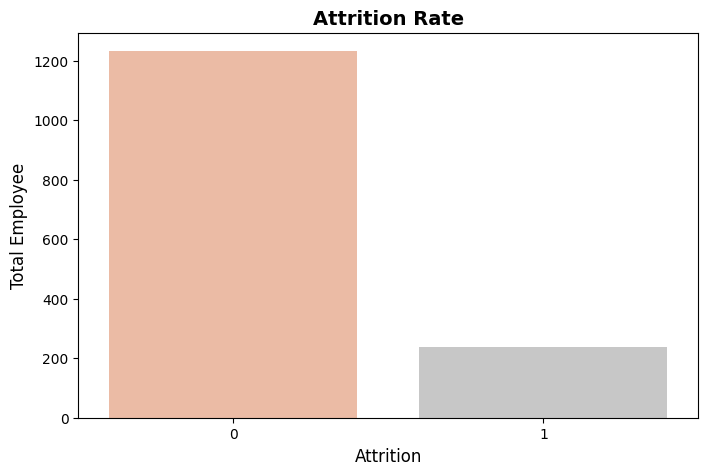

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(x='Attrition', data=df, palette = 'RdGy')
plt.title('Attrition Rate', fontsize=14, weight='bold')
plt.xlabel('Attrition', fontsize = 12)
plt.ylabel('Total Employee', fontsize = 12);

As we can see, the target is imbalanced



Multivariate Analysis

1. Heatmap

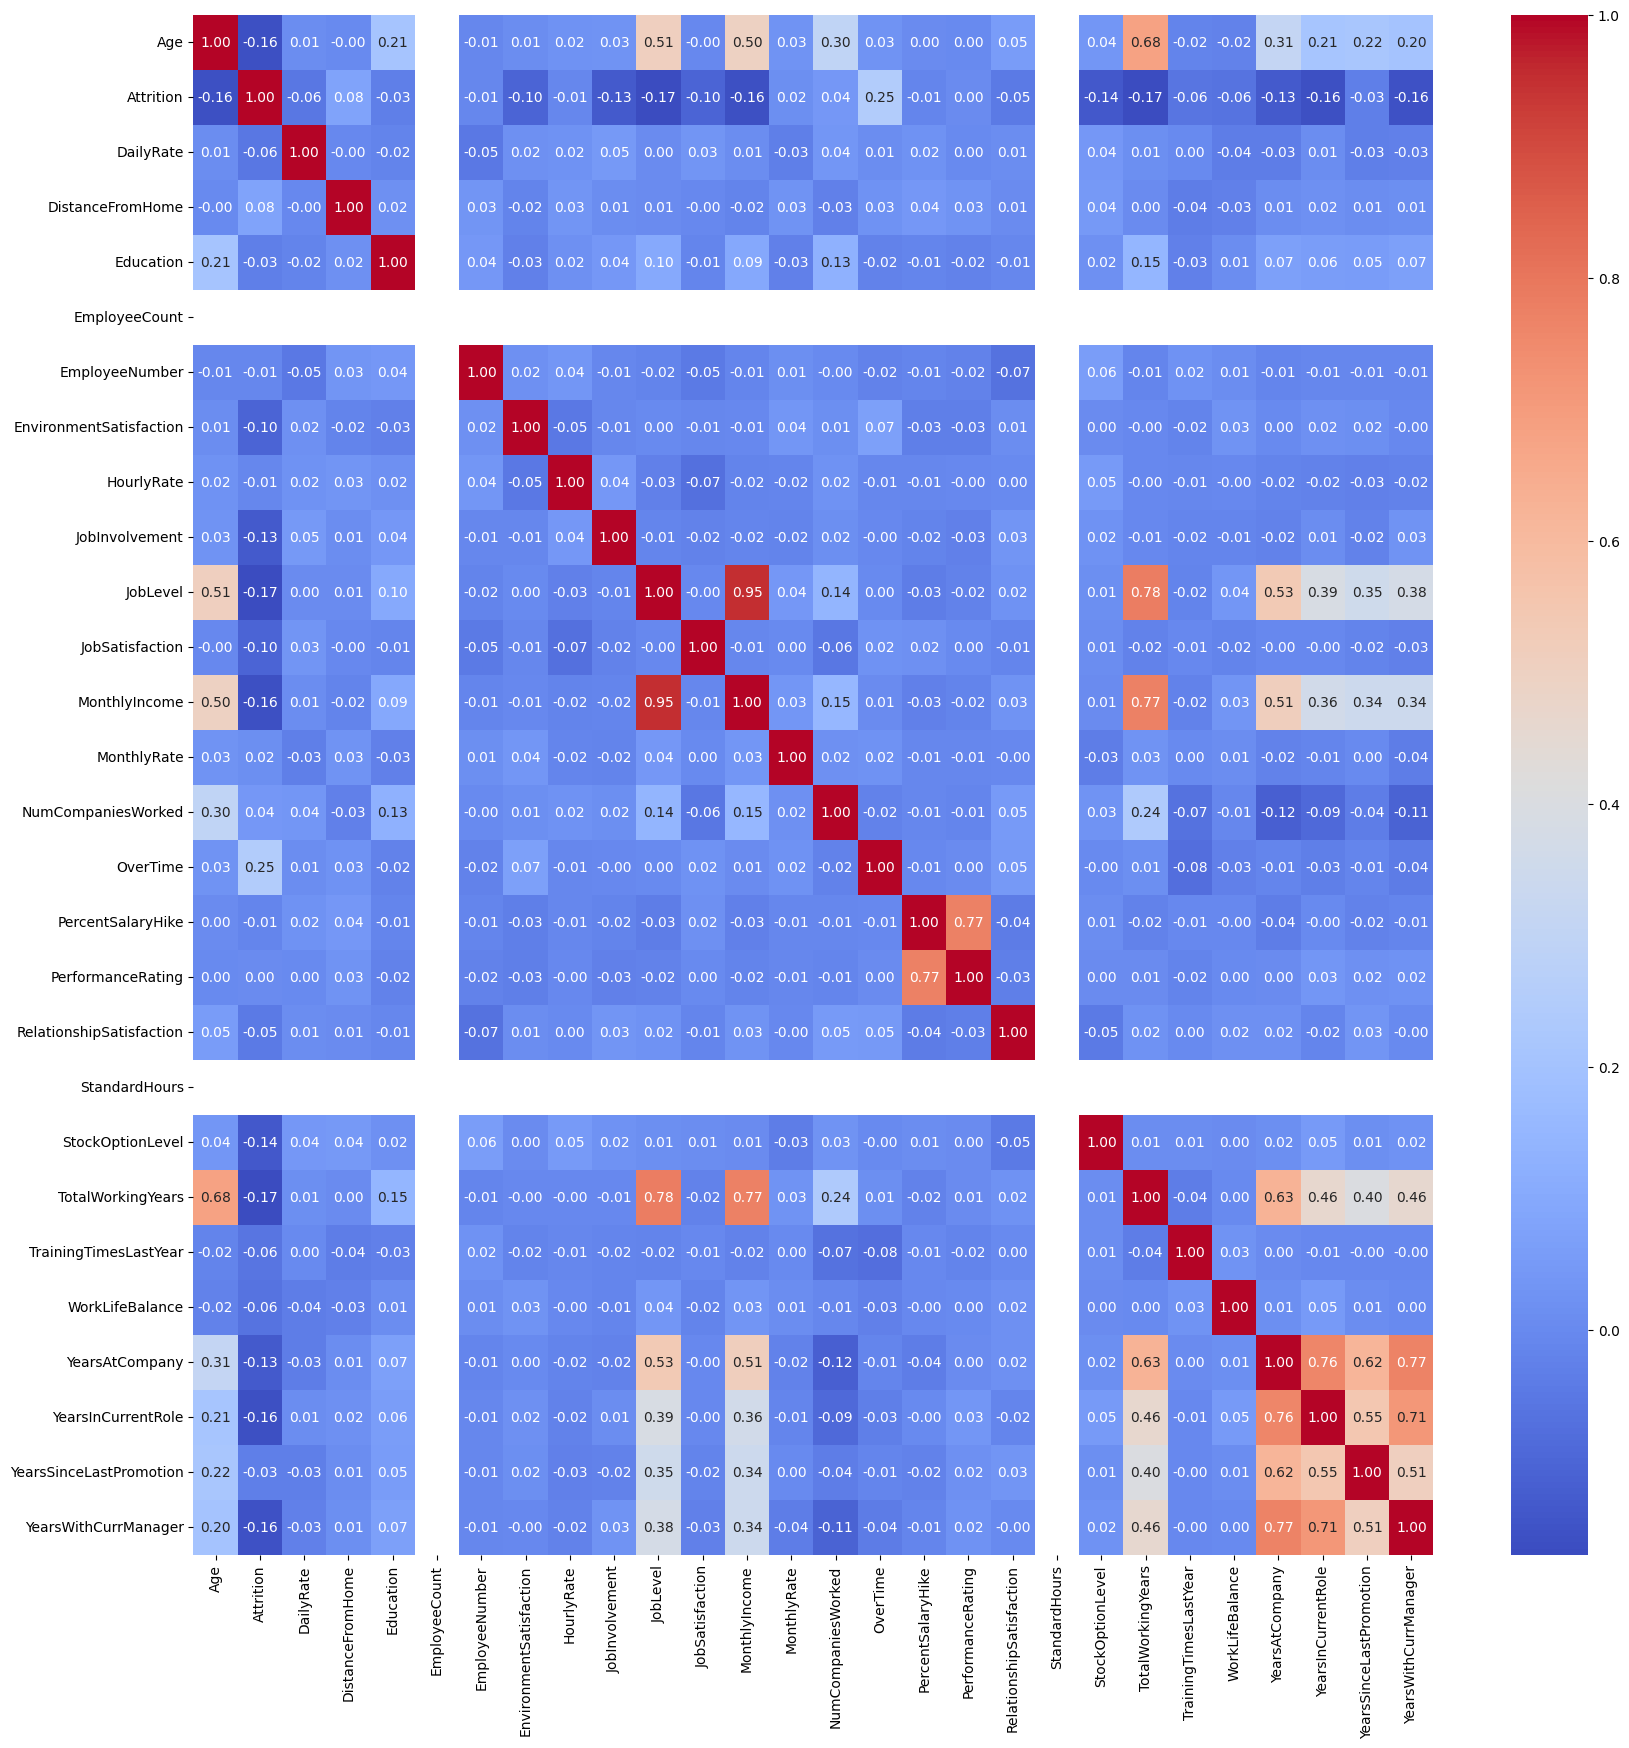

In [14]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

The relation between features and target is kinda weak, where the highest correlation is with OverTime



2. Attrition x Numerical Features

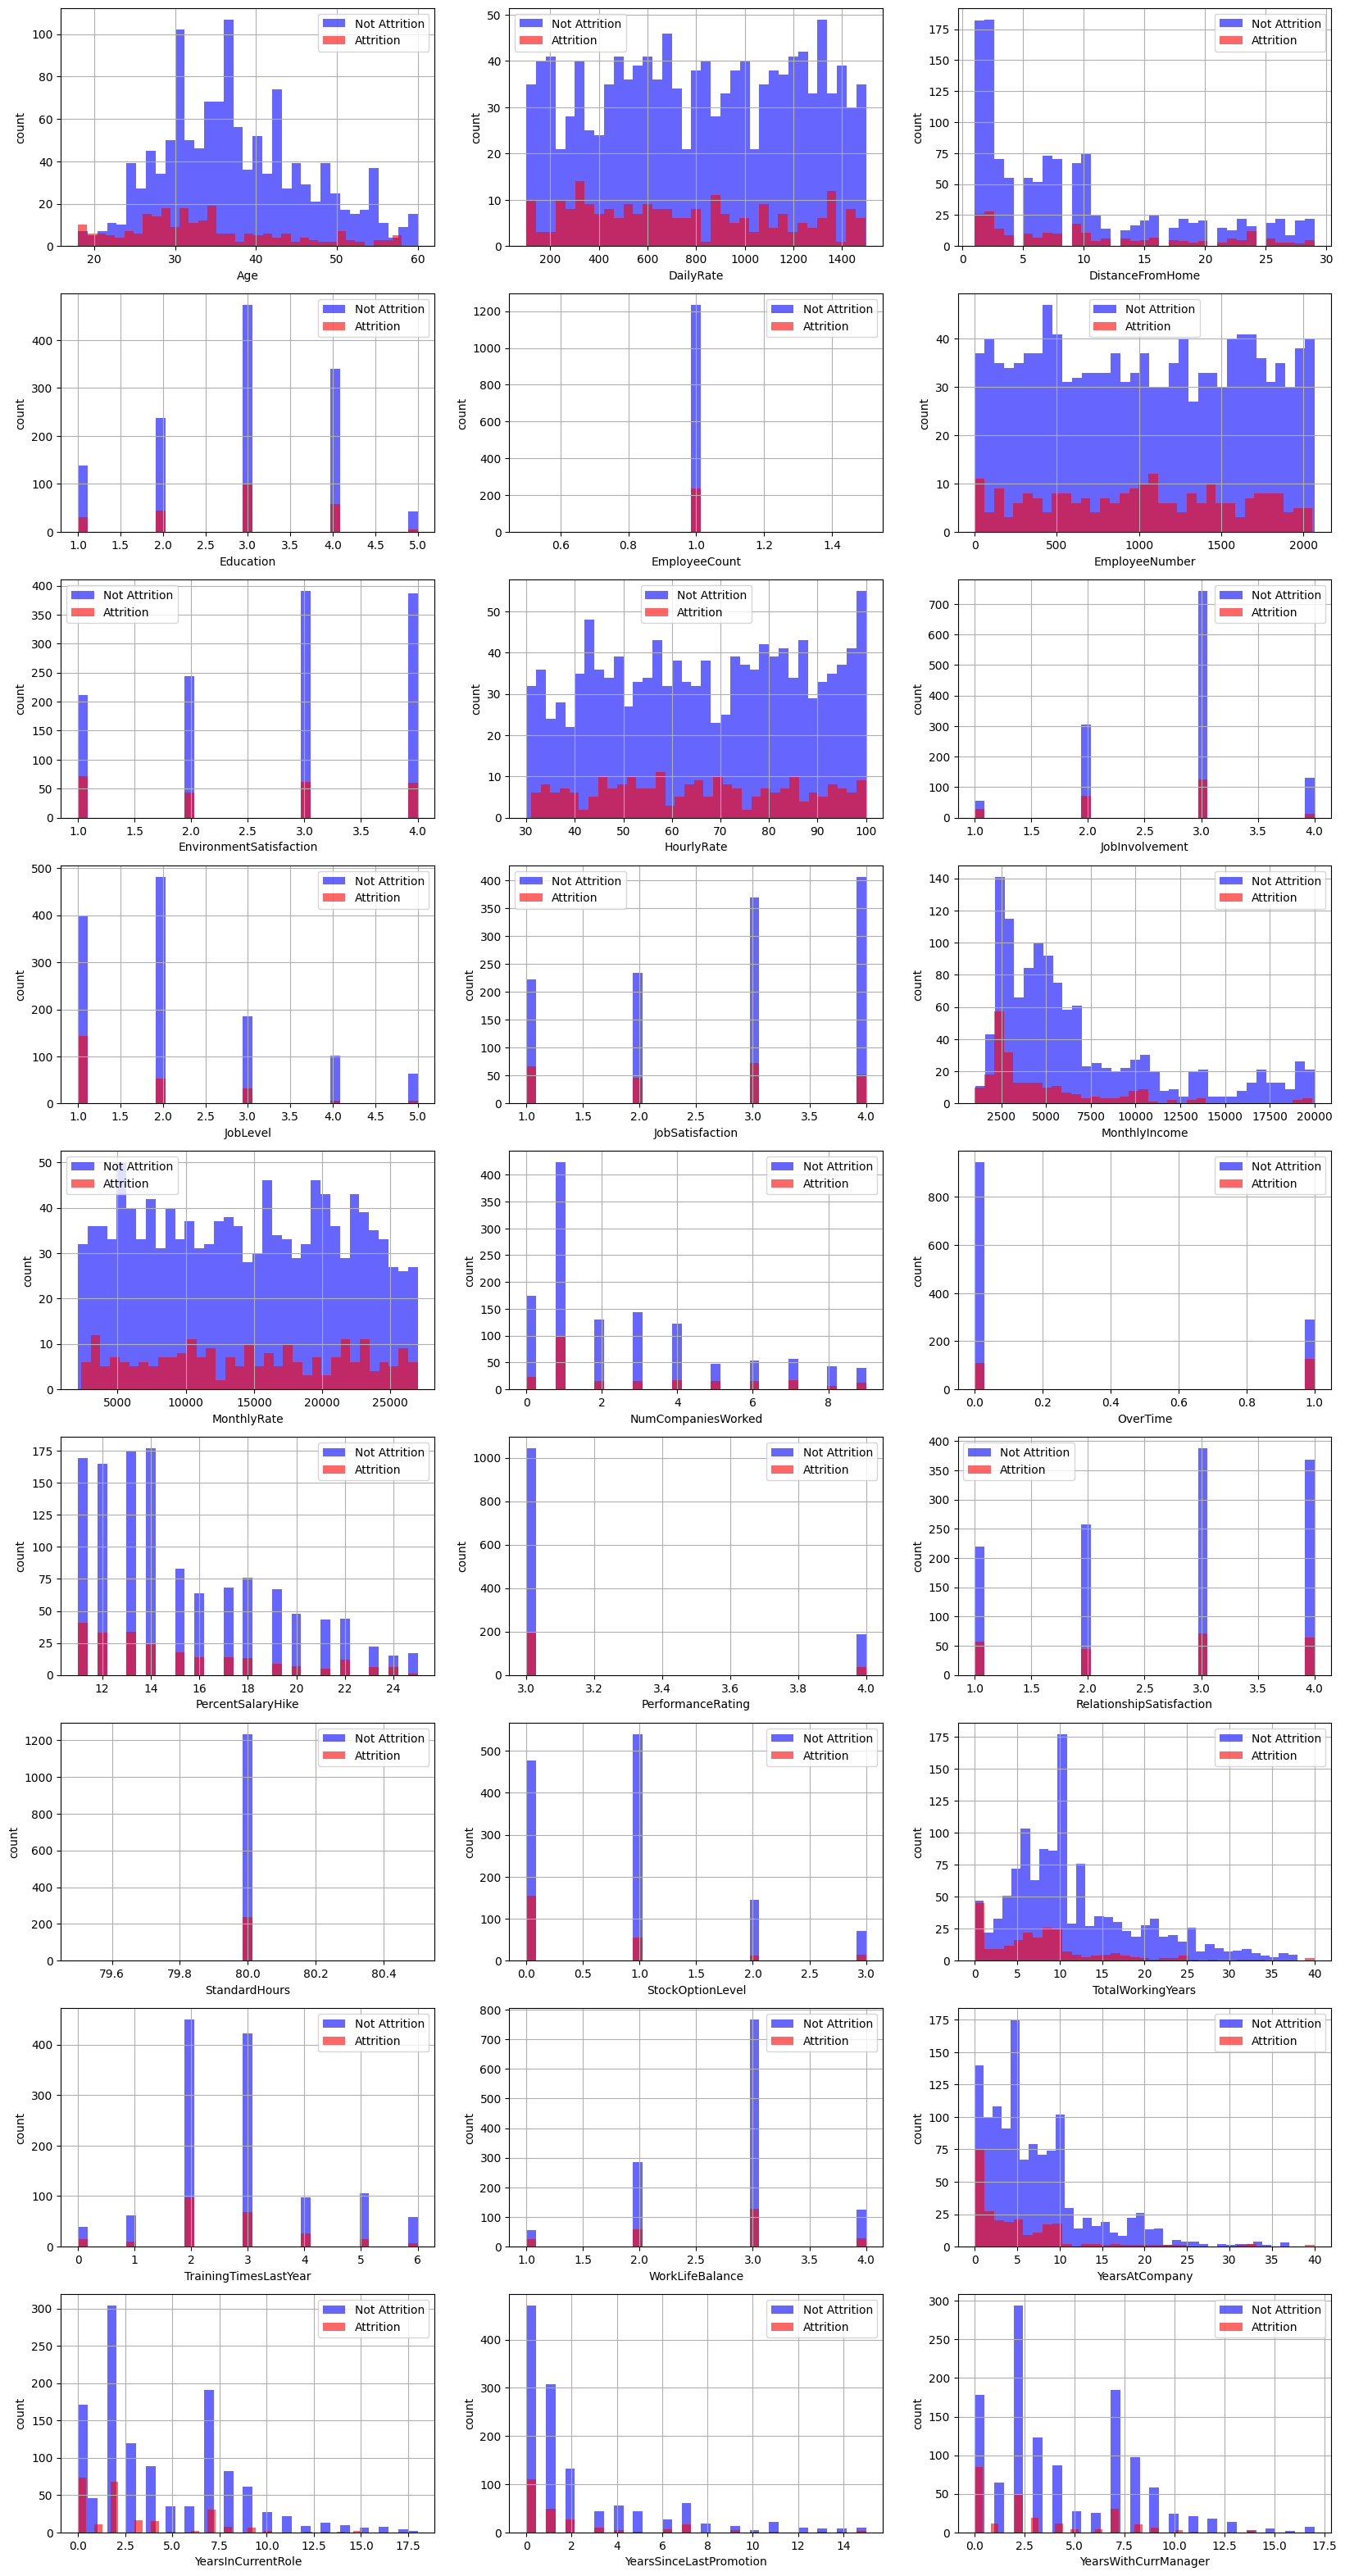

In [15]:
numerical_features = []
for column in df.columns:
    if df[column].dtype != object:
        numerical_features.append(column)

numerical_features.remove('Attrition')

plt.figure(figsize=(20, 40))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(9, 3, i)
    df[df["Attrition"] == 0][feature].hist(bins=35, color='blue', label='Not Attrition', alpha=0.6)
    df[df["Attrition"] == 1][feature].hist(bins=35, color='red', label='Attrition', alpha=0.6)
    plt.legend()
    plt.xlabel(feature)
    plt.ylabel('count')

There are some insights:

Employees with low satisfaction (indicated by EnvironmentSatisfaction, JobSatisfaction, RelationshipSatisfaction) tend to resign

Employees with low benefit (indicated by MonthlyIncome,
StockOptionLevel tend to resign

Young employees tend to resign

Employees with high number of company worked tend to resign

Overtime employees tend to resign

3. Attrition x Categorical Features

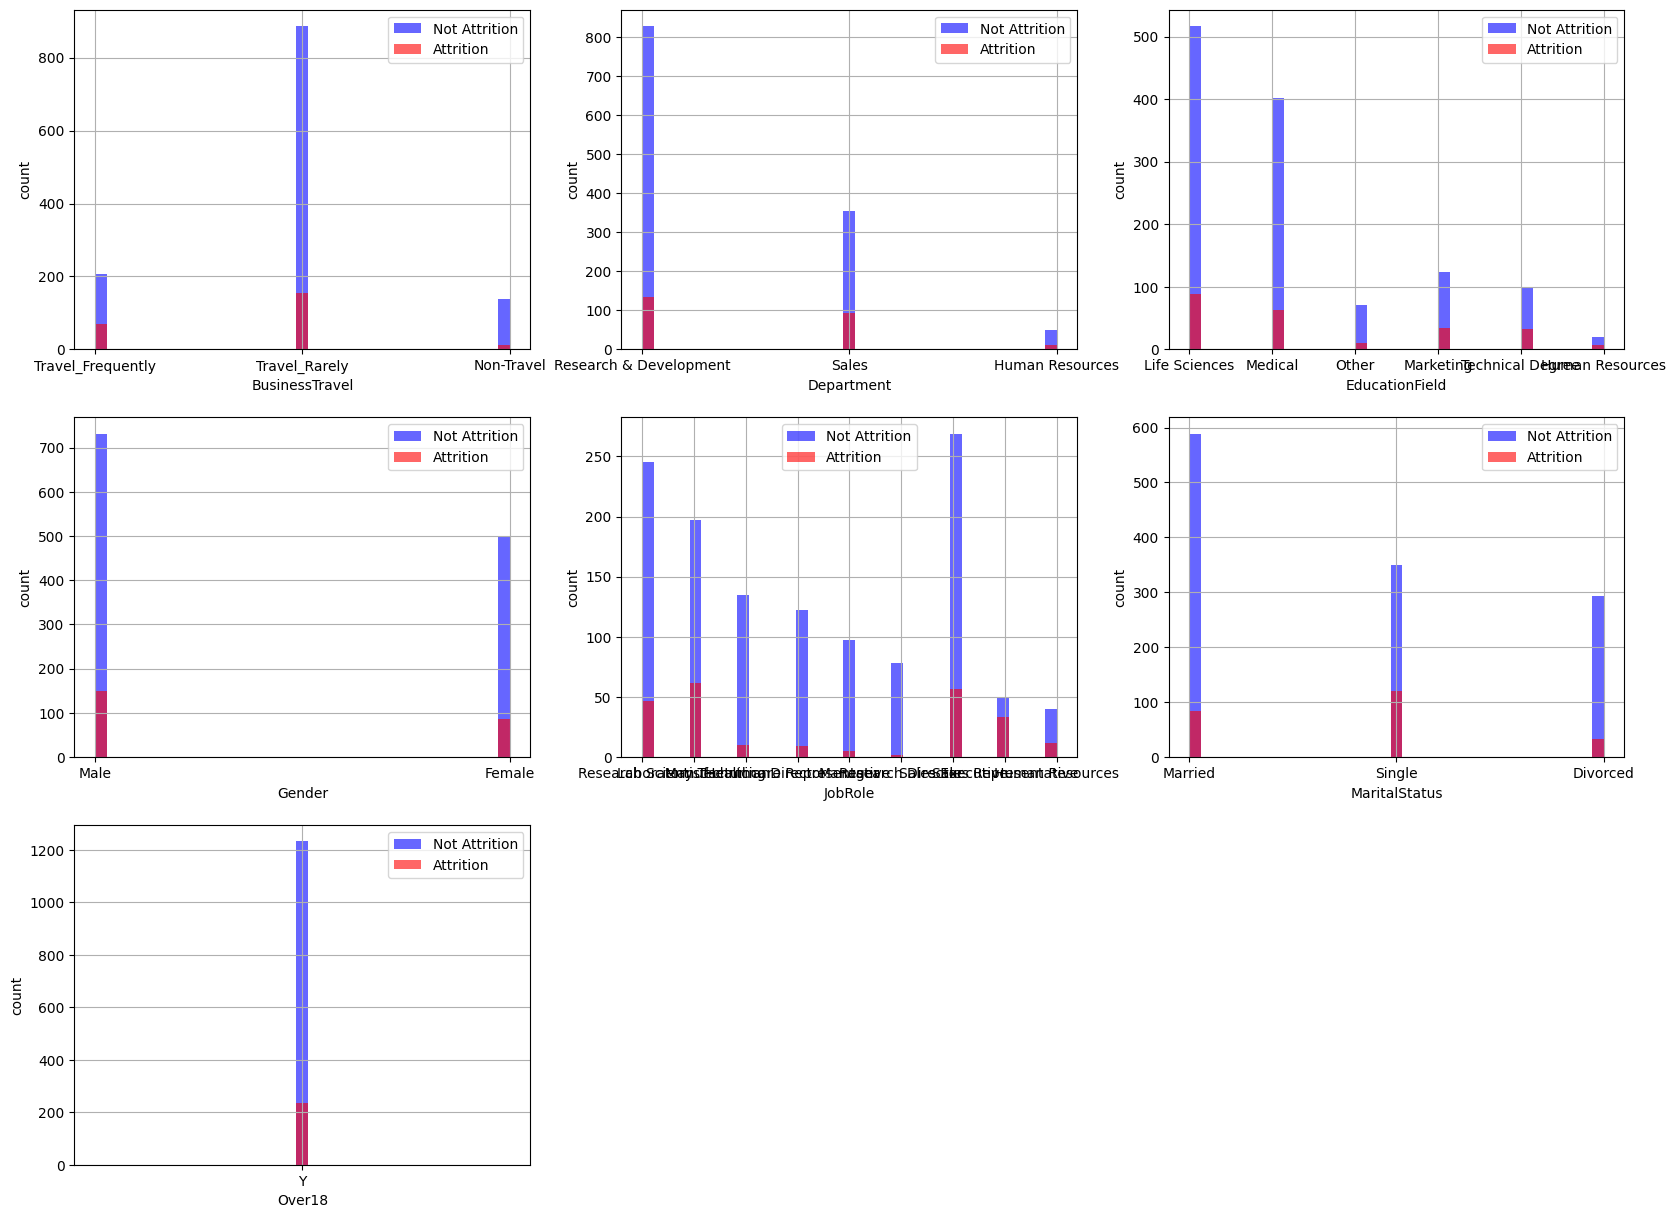

In [16]:
categorical_features = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_features.append(column)

plt.figure(figsize=(20, 15))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    df[df["Attrition"] == 0][feature].hist(bins=35, color='blue', label='Not Attrition', alpha=0.6)
    df[df["Attrition"] == 1][feature].hist(bins=35, color='red', label='Attrition', alpha=0.6)
    plt.legend()
    plt.xlabel(feature)
    plt.ylabel('count')

There are some insights:

Employees who travel frequently tend to resign

Sales employees tend to resign

Single employees tend to resign

Female employees tend to resign

##Phase 1

I'll be using Decision Tree for 4 datasets (imbalance, undersampling, oversampling random, oversampling smote)



In [17]:
df_s1 = df.copy()


In [18]:
#Check if there are missing values and whether the data type is appopriate
df_s1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There are no missing values and all data types are appropriate



In [19]:
#Check if there is any duplicate data
df_s1.duplicated().sum()

0

Feature Encoding

In [20]:
cats_onehot = ['BusinessTravel','Department', 'EducationField', 'Gender','JobRole','MaritalStatus']

#Feature encoding for categorical data using onehots
for cat in cats_onehot:
    onehots = pd.get_dummies(df_s1[cat], prefix=cat)
    df_s1 = df_s1.join(onehots)

df_s1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


Feature Selection

In [21]:
#Drop categorical data and unnecessary features
df_s1 = df_s1.drop(['BusinessTravel','Department', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'StandardHours'], axis = 1)

In [22]:
df_s1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 51 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   HourlyRate                         1470 non-null   int64
 7   JobInvolvement                     1470 non-null   int64
 8   JobLevel                           1470 non-null   int64
 9   JobSatisfaction                    1470 non-null   int64
 10  MonthlyIncome                      1470 non-null   int64
 11  MonthlyRate                        1470 non-null   int64
 12  NumCompaniesWorked  

There are no duplicate data



Modeling

In [23]:
#Split features and target
X = df_s1.drop(columns=['Attrition'])
y = df_s1['Attrition']
print(X.shape)
print(y.shape)

(1470, 50)
(1470,)


In [24]:
#Create undersampling and oversampling datasets
X_under, y_under = under_sampling.RandomUnderSampler(random_state=42).fit_resample(X, y)
X_over, y_over = over_sampling.RandomOverSampler(random_state=42).fit_resample(X, y)
X_over_smote, y_over_smote = over_sampling.SMOTE(random_state=42).fit_resample(X, y)

In [25]:
print(pd.Series(y).value_counts())
print(pd.Series(y_under).value_counts())
print(pd.Series(y_over).value_counts())
print(pd.Series(y_over_smote).value_counts())

0    1233
1     237
Name: Attrition, dtype: int64
0    237
1    237
Name: Attrition, dtype: int64
1    1233
0    1233
Name: Attrition, dtype: int64
1    1233
0    1233
Name: Attrition, dtype: int64


In [26]:
#Split data training and data test

#Imbalance
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.3, random_state = 42)

#Undersampling
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_under, y_under, test_size = 0.3, random_state = 42)

#Oversampling random
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_over, y_over, test_size = 0.3, random_state = 42)

#Oversampling smote
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_over_smote, y_over_smote, test_size = 0.3, random_state = 42)

In [27]:
def eval_classification(model, pred, proba, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))

    fpr, tpr, thresholds = roc_curve(ytest, proba, pos_label=1)
    print("AUC: %.2f" % auc(fpr, tpr))

Imbalance Dataset

In [28]:
#Training
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train1,y_train1)

#Predict
y_pred = model.predict(X_test1)
y_proba = model.predict_proba(X_test1)
y_proba = y_proba[:,1]

#Eval
eval_classification(model, y_pred, y_proba, X_train1, y_train1, X_test1, y_test1)

Accuracy (Test Set): 0.80
Precision (Test Set): 0.31
Recall (Test Set): 0.38
F1-Score (Test Set): 0.34
AUC: 0.62


In [29]:
#Checking accuracy of data training and data test
print('Train score: ' + str(model.score(X_train1, y_train1)))
print('Test score:' + str(model.score(X_test1, y_test1)))

Train score: 1.0
Test score:0.7959183673469388


Undersampling Dataset


In [30]:
#Training
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train2,y_train2)

#Predict
y_pred = model.predict(X_test2)
y_proba = model.predict_proba(X_test2)
y_proba = y_proba[:,1]

#Eval
eval_classification(model, y_pred, y_proba, X_train2, y_train2, X_test2, y_test2)

Accuracy (Test Set): 0.66
Precision (Test Set): 0.66
Recall (Test Set): 0.63
F1-Score (Test Set): 0.64
AUC: 0.66


In [31]:
#Checking accuracy of data training and data test
print('Train score: ' + str(model.score(X_train2, y_train2)))
print('Test score:' + str(model.score(X_test2, y_test2)))

Train score: 1.0
Test score:0.6573426573426573


Oversampling Random Dataset

In [32]:
#Training
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train3,y_train3)

#Predict
y_pred = model.predict(X_test3)
y_proba = model.predict_proba(X_test3)
y_proba = y_proba[:,1]

#Eval
eval_classification(model, y_pred, y_proba, X_train3, y_train3, X_test3, y_test3)

Accuracy (Test Set): 0.91
Precision (Test Set): 0.86
Recall (Test Set): 0.99
F1-Score (Test Set): 0.92
AUC: 0.91


In [33]:
#Checking accuracy of data training and data test
print('Train score: ' + str(model.score(X_train3, y_train3)))
print('Test score:' + str(model.score(X_test3, y_test3)))

Train score: 1.0
Test score:0.9121621621621622


Oversampling SMOTE Dataset


In [34]:
#Training
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train4,y_train4)

#Predict
y_pred = model.predict(X_test4)
y_proba = model.predict_proba(X_test4)
y_proba = y_proba[:,1]

#Eval
eval_classification(model, y_pred, y_proba, X_train4, y_train4, X_test4, y_test4)

Accuracy (Test Set): 0.85
Precision (Test Set): 0.83
Recall (Test Set): 0.87
F1-Score (Test Set): 0.85
AUC: 0.85


In [35]:
#Checking accuracy of data training and data test
print('Train score: ' + str(model.score(X_train4, y_train4)))
print('Test score:' + str(model.score(X_test4, y_test4)))

Train score: 1.0
Test score:0.845945945945946


Based on the results, random oversampling show the best performance from all. Therefore, I'll proceed the prediction using random oversampling dataset.

---
# Phase 2
Using CatBoost for random oversampling dataset

In [36]:
df_s2 = df.copy()


## Data Pre-Processing

### 1. Feature Engineering
- Grouping job role based on job level
- Grouping age generation

In [37]:
list_roles = []

for index, kolom in df_s2.iterrows():
    if kolom['JobRole'] == 'Sales Executive' or kolom['JobRole'] == 'Laboratory Technician' or kolom['JobRole'] == 'Human Resources':
        result = 'Staff'
    elif kolom['JobRole'] == 'Sales Representative' or kolom['JobRole'] == 'Healthcare Representative' or kolom['JobRole'] == 'Research Scientist':
        result = 'Middle'
    else:
        result = 'Executive'

    list_roles.append(result)

df_s2['JobRole'] = list_roles
df_s2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Staff,4,Single,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Middle,2,Married,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Staff,3,Single,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Middle,3,Married,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Staff,2,Married,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2


In [38]:
list_gen = []

for index, kolom in df_s2.iterrows():
    if kolom['Age'] >= 55:
        result = 'Boomers'
    elif kolom['Age'] >= 40 and kolom['Age'] <= 54:
        result = 'Gen X'
    elif kolom['Age'] >= 23 and kolom['Age'] <= 39:
        result = 'Gen Y'
    else:
        result = 'Gen Z'
    list_gen.append(result)

df_s2['Generation'] = list_gen
df_s2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Generation
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Staff,4,Single,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5,Gen X
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Middle,2,Married,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7,Gen X
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Staff,3,Single,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0,Gen Y
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Middle,3,Married,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0,Gen Y
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Staff,2,Married,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2,Gen Y


### 2. Feature Selection
In addition of unnecessary features before (EmployeeCount, EmployeeNumber, Over18, StandardHours) I decided to drop Rate features (DailyRate, HourlyRate, MonthlyRate) because it's the rate that company must pay not the employee received.

In [39]:
#Drop unnecessary features
df_s2 = df_s2.drop(['DailyRate', 'EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'Over18', 'MonthlyRate', 'StandardHours'], axis = 1)
df_s2.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Generation
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,2,Staff,4,Single,5993,8,1,11,3,1,0,8,0,1,6,4,0,5,Gen X
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,2,Middle,2,Married,5130,1,0,23,4,4,1,10,3,3,10,7,1,7,Gen X
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,1,Staff,3,Single,2090,6,1,15,3,2,0,7,3,3,0,0,0,0,Gen Y
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,1,Middle,3,Married,2909,1,1,11,3,3,0,8,3,3,8,7,3,0,Gen Y
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,1,Staff,2,Married,3468,9,0,12,3,4,1,6,3,3,2,2,2,2,Gen Y


In [40]:
df_s2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   object
 14  MonthlyIncome           

In [41]:
#Define categorical features for modelling
cat_features = ['BusinessTravel','Department','EducationField', 'Gender', 'Generation','JobRole','MaritalStatus']

## Modeling
Since I'll be using oversampling method for training the model, I'll be using 2 kind of dataset for evaluation:
1. Data test (oversampling)
2. Data eval (imbalance)

This is to make sure the model is able to predict imbalance data as well, because in the production most likely the data will be imbalanced

In [42]:
#Split features and target
X = df_s2.drop(columns=['Attrition'])
y = df_s2['Attrition']
print(X.shape)
print(y.shape)

(1470, 28)
(1470,)


In [43]:
#Split data training and data eval (before oversampling)
X1_train, X_eval, y1_train, y_eval = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [44]:
#Oversampling data training
X_over, y_over = over_sampling.RandomOverSampler(random_state=42).fit_resample(X1_train, y1_train)

In [45]:
#Split data training and data test (after oversampling)
X2_train, X_test, y2_train, y_test = train_test_split(X_over, y_over, test_size = 0.3, random_state = 42)

### Evaluate with data eval

In [46]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(learning_rate=0.05, random_state=42, iterations=300, eval_metric='AUC')

clf.fit(X2_train, y2_train, cat_features= cat_features, plot=False, eval_set=(X_eval, y_eval), verbose=True)

y_pred = clf.predict(X_eval)
y_proba = clf.predict_proba(X_eval)
y_proba = y_proba[:,1]
eval_classification(clf, y_pred, y_proba, X2_train, y2_train, X_eval, y_eval)

0:	test: 0.6835554	best: 0.6835554 (0)	total: 60ms	remaining: 17.9s
1:	test: 0.6204418	best: 0.6835554 (0)	total: 64.9ms	remaining: 9.68s
2:	test: 0.6456872	best: 0.6835554 (0)	total: 69.5ms	remaining: 6.88s
3:	test: 0.6102735	best: 0.6835554 (0)	total: 73.9ms	remaining: 5.46s
4:	test: 0.6406031	best: 0.6835554 (0)	total: 78.1ms	remaining: 4.61s
5:	test: 0.6472651	best: 0.6835554 (0)	total: 82.3ms	remaining: 4.03s
6:	test: 0.6490182	best: 0.6835554 (0)	total: 86.7ms	remaining: 3.63s
7:	test: 0.6644460	best: 0.6835554 (0)	total: 90.8ms	remaining: 3.31s
8:	test: 0.6630435	best: 0.6835554 (0)	total: 94.9ms	remaining: 3.07s
9:	test: 0.6623422	best: 0.6835554 (0)	total: 99.2ms	remaining: 2.88s
10:	test: 0.6907433	best: 0.6907433 (10)	total: 105ms	remaining: 2.75s
11:	test: 0.6851332	best: 0.6907433 (10)	total: 110ms	remaining: 2.63s
12:	test: 0.7019635	best: 0.7019635 (12)	total: 114ms	remaining: 2.51s
13:	test: 0.7026648	best: 0.7026648 (13)	total: 118ms	remaining: 2.42s
14:	test: 0.715988

In [47]:
print('Train score: ' + str(clf.score(X2_train, y2_train)))
print('Test score:' + str(clf.score(X_eval, y_eval)))

Train score: 0.9561855670103093
Test score:0.7891156462585034


The result of evaluation with imbalance dataset is good enough, but the model shows the sign of overfitting

### Evaluate with data test

In [49]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(learning_rate=0.05, random_state=42, iterations=300, eval_metric='Accuracy')

clf.fit(X2_train, y2_train, cat_features= cat_features, plot=False, eval_set=(X_test, y_test), verbose=True)

y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)
y_proba = y_proba[:,1]
eval_classification(clf, y_pred, y_proba, X2_train, y2_train, X_test, y_test)

0:	learn: 0.7680412	test: 0.7417417	best: 0.7417417 (0)	total: 13ms	remaining: 3.88s
1:	learn: 0.7802835	test: 0.7372372	best: 0.7417417 (0)	total: 23.8ms	remaining: 3.55s
2:	learn: 0.7899485	test: 0.7582583	best: 0.7582583 (2)	total: 31.5ms	remaining: 3.12s
3:	learn: 0.8047680	test: 0.7807808	best: 0.7807808 (3)	total: 40ms	remaining: 2.96s
4:	learn: 0.8125000	test: 0.7792793	best: 0.7807808 (3)	total: 50.6ms	remaining: 2.98s
5:	learn: 0.8240979	test: 0.7882883	best: 0.7882883 (5)	total: 63ms	remaining: 3.08s
6:	learn: 0.8253866	test: 0.7927928	best: 0.7927928 (6)	total: 74.4ms	remaining: 3.11s
7:	learn: 0.8208763	test: 0.7942943	best: 0.7942943 (7)	total: 84.3ms	remaining: 3.08s
8:	learn: 0.8221649	test: 0.7942943	best: 0.7942943 (7)	total: 95ms	remaining: 3.07s
9:	learn: 0.8247423	test: 0.7957958	best: 0.7957958 (9)	total: 105ms	remaining: 3.05s
10:	learn: 0.8286082	test: 0.8048048	best: 0.8048048 (10)	total: 116ms	remaining: 3.04s
11:	learn: 0.8369845	test: 0.8093093	best: 0.809309

In [50]:
#Checking accuracy of data training and data test
print('Train score: ' + str(clf.score(X2_train, y2_train)))
print('Test score:' + str(clf.score(X_test, y_test)))

Train score: 1.0
Test score:0.948948948948949


In [51]:
cf = confusion_matrix(y_test, y_pred)
cf

array([[304,  34],
       [  0, 328]])

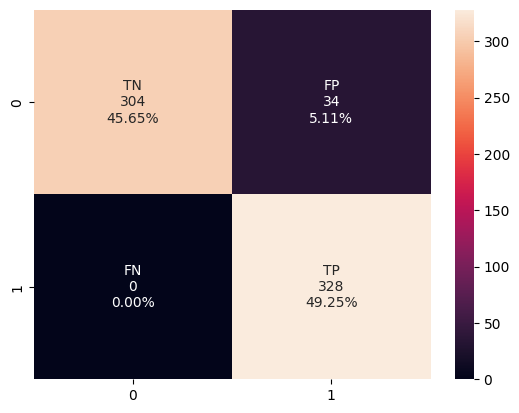

In [52]:
group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf, annot=labels, fmt='', cmap='rocket');

The result of evaluation with oversampling dataset is excellent, with no signs of overfitting

### Interpretation with SHAP

In [53]:
explainer = shap.Explainer(clf)
shap_values = explainer(X)

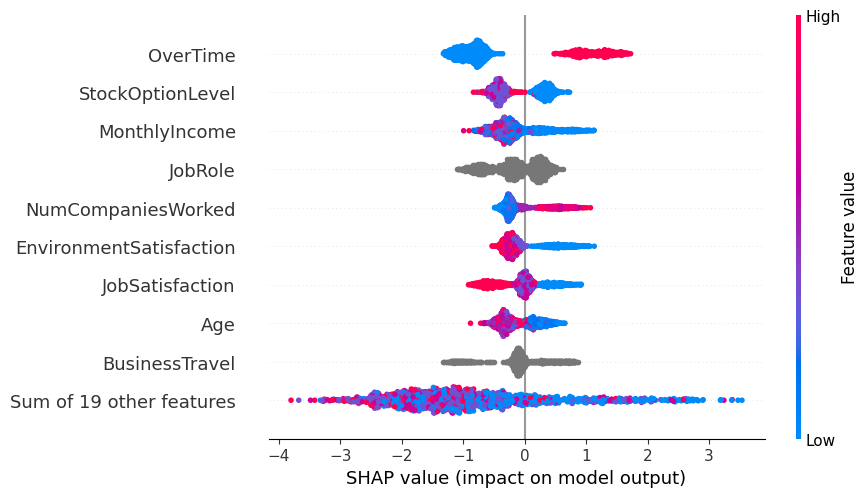

In [54]:
shap.plots.beeswarm(shap_values)

The plot above shows the 9 features that affecting employee's decision to resign or not. As we can see OverTime, StockOptionLevel, and MonthlyIncome are highly affecting employee's attrition. Therefore, with these insights I came up with some strategies:
1. Evaluate the workload of employees, why do they get overtime? And even if they have to do overtime, the benefit needed to be re-evaluated
2. Build an appropriate culture and create a good work environment in order to increase EnvironmentSatisfaction and JobSatisfaction
3. Give or increase StockOptionLevel to high value employees who tend to attrition